In [34]:
from pathlib import Path
import sys

notebook_dir = Path.cwd()
others_path = notebook_dir.parent

others_path = others_path.resolve()
if str(others_path) not in sys.path:
    sys.path.append(str(others_path))

import numpy as np
import matplotlib.pyplot as plt

import eos
import kernels
import gaussianprocess
from pqcd.pQCD import pQCD
import prepare_ceft as pc
import prepare_pqcd as pp
import sampling as sam
import anal_helpers as anal
from constants import ns, crust_end, get_phi
from pqcd.pQCD import pQCD


# initialisation

In [35]:
X = np.geomspace(1/2,2,100)
mu_grid = np.linspace(2.2,3,100)

In [36]:
from multiprocessing import Pool
import os


def compute_n_cs2(iteration):
    pQCD_temp = pQCD(iteration)
    n_temp = np.vectorize(pQCD_temp.number_density)(mu_grid) / 0.16  # nsat
    cs2_temp = np.vectorize(pQCD_temp.speed2)(mu_grid)
    return [n_temp, cs2_temp]

with Pool(processes=os.cpu_count()) as pool:
    n_cs2_arrays = pool.map(compute_n_cs2, X)

n_cs2_arrays = np.asarray(n_cs2_arrays)

In [37]:
n_cs2_arrays = []

for iteration in X:
    pQCD_temp = pQCD(iteration)
    n_temp  = np.vectorize(pQCD_temp.number_density)(mu_grid)/0.16 #nsat
    cs2_temp = np.vectorize(pQCD_temp.speed2)(mu_grid)
    X_temp = [n_temp,cs2_temp]
    n_cs2_arrays.append(X_temp)

n_cs2_arrays = np.asarray(n_cs2_arrays)

In [38]:
np.asarray(n_cs2_arrays).shape

(100, 2, 100)

In [39]:
# np.asarray(n_cs2_arrays)[1][0]
# first index selects the X,
# second index selects n or cs2, 
# third index selects the elements

round n to integers

```
n_values = data[:, 0, :]
n_rounded = np.round(n_values).astype(int)

c_count = 1

cs2_sum = cs2[0] 

for i in range(n): #n is rounded

    if i!=len(n)-1:

        if n_i+1 = n_i:

            cs2_sum += cs2[i+1]
            c_count += 1

        else:
            cs2_bin.append(cs2_sum/cs2_count)

            if cs2_count != 1:
                n_bin.append(n[i-1])
                
            else:
                n_bin.append(n[i])

            cs2_count = 1
            cs2_sum = cs2[i+1]

    else:
        cs2_bin.append(cs2_sum/cs2_count)

        if cs2_count !=1:
            n_bin.append(n[i-1])
        else:
            n_bin.append(n[i])


```

In [40]:
n_test = n_cs2_arrays[1,0,:]
cs2_test = n_cs2_arrays[1,1,:]

n_rounded = np.round(n_test).astype(int)
cs2_count = 1
cs2_sum = cs2_test[0]
cs2_bin=[]
n_bin=[]

In [41]:
def append_bins(cs2_bin, n_bin, n_rounded, cs2_sum, cs2_count, i):
    
    cs2_bin.append(float(cs2_sum / cs2_count))
    if cs2_count != 1:
        n_bin.append(int(n_rounded[i - 1]))
    else:
        n_bin.append(int(n_rounded[i]))

In [42]:
for i in range(len(n_rounded)): #n is rounded

    if i!=len(n_rounded)-1:

        if n_rounded[i+1] == n_rounded[i]:
            cs2_sum += cs2_test[i+1]
            cs2_count += 1

        else:
            append_bins(cs2_bin, n_bin, n_rounded, cs2_sum, cs2_count, i)
            cs2_count = 1
            cs2_sum = cs2_test[i+1]

    else:
        append_bins(cs2_bin, n_bin, n_rounded, cs2_sum, cs2_count, i)


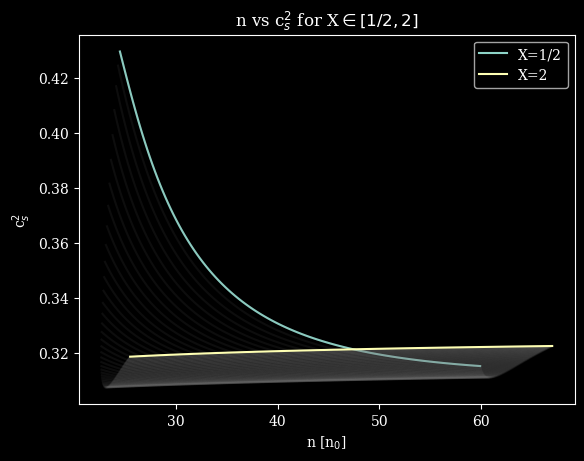

In [43]:
plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"

for idx, (n_i, cs2_i) in enumerate(n_cs2_arrays):
    if idx == 0:
        plt.plot(n_i, cs2_i, label=f'X=1/2')
    if idx == len(X)-1:
        plt.plot(n_i, cs2_i, label=f'X=2')
    else:
        plt.plot(n_i, cs2_i, alpha=0.1, color='grey')

plt.ylabel('c$_s^2$')
plt.xlabel('n [n$_0$]')
plt.title('n vs c$_s^2$ for X$\in [1/2,2]$')
plt.legend()
plt.show()

# now loop over all X sets

In [44]:
binned_data = []

for k in range(len(X)):

    n_iter = n_cs2_arrays[k,0,:]
    cs2_iter = n_cs2_arrays[k,1,:]

    n_rounded = np.round(n_iter).astype(int)
    cs2_count = 1
    cs2_sum = cs2_iter[0]
    cs2_bin=[]
    n_bin=[]

    for i in range(len(n_rounded)): #n is rounded

        if i!=len(n_rounded)-1:

            if n_rounded[i+1] == n_rounded[i]:
                cs2_sum += cs2_iter[i+1]
                cs2_count += 1

            else:
                append_bins(cs2_bin, n_bin, n_rounded, cs2_sum, cs2_count, i)
                cs2_count = 1
                cs2_sum = cs2_iter[i+1]

        else:
            append_bins(cs2_bin, n_bin, n_rounded, cs2_sum, cs2_count, i)

    binned_data.append([n_bin,cs2_bin])


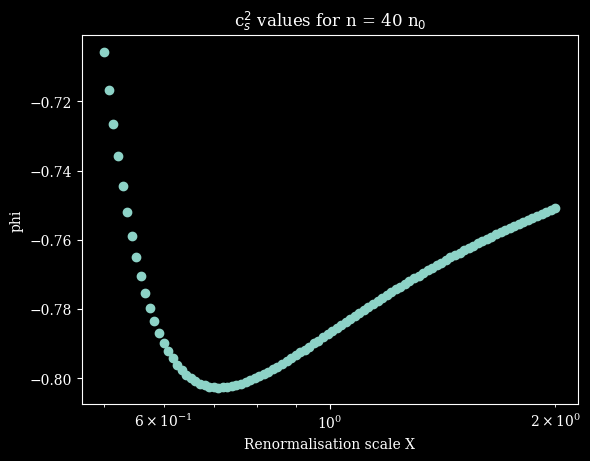

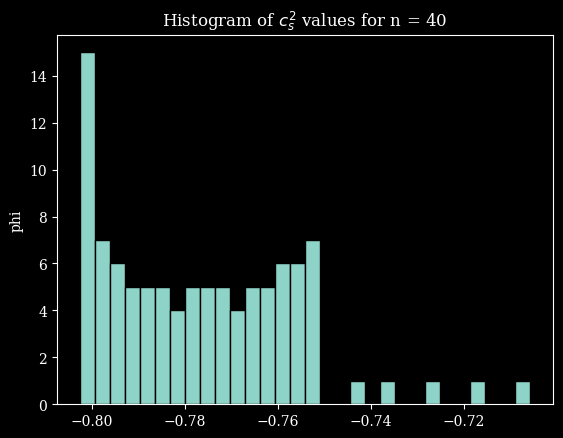

In [45]:
interest_n = 40

cs2_values_n = np.array([cs2[n_i.index(interest_n)] for n_i, cs2 in binned_data if interest_n in n_i])

from helpers import get_phi

plt.scatter(X, get_phi(cs2_values_n))
#plt.ylabel('$c_s^2$')
plt.ylabel('phi')
plt.xlabel('Renormalisation scale X')
plt.xscale('log')
plt.title(f'c$_s^2$ values for n = {interest_n} n$_0$')
plt.rcParams['font.family'] = 'serif'
plt.show()

plt.hist(get_phi(cs2_values_n), bins=30, edgecolor='black')
plt.ylabel('Frequency')
plt.ylabel('phi')

#plt.xlabel('$c_s^2$')
plt.title(f'Histogram of $c_s^2$ values for n = {interest_n}')
plt.show()

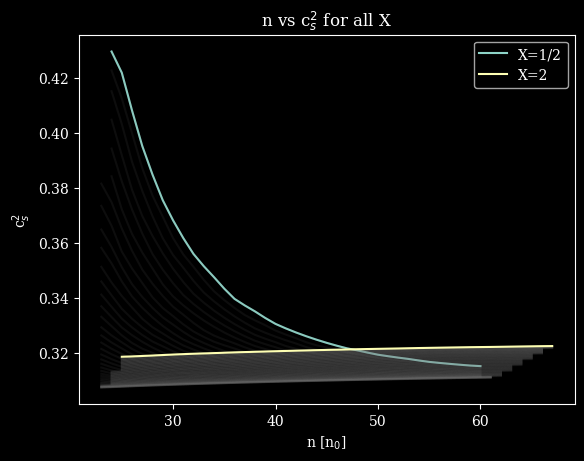

In [46]:
for idx, (n_i, cs2_i) in enumerate(binned_data):
    if idx == 0:
        plt.plot(n_i, cs2_i, label=f'X=1/2')
    if idx == len(X)-1:
        plt.plot(n_i, cs2_i, label=f'X=2')
    else:
        plt.plot(n_i, cs2_i, alpha=0.1, color='grey')

plt.ylabel('c$_s^2$')
plt.xlabel('n [n$_0$]')
plt.title('n vs c$_s^2$ for all X')
plt.legend()
plt.show()

In [47]:
np.array(binned_data[0][0]).T

array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60])

In [48]:
np.array(binned_data[-1][0]).T

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67])

In [49]:
s = 25
e = 60
cs2_min = []
cs2_max = []
cs2_mean = []

for i in range(s,e):
    interest_n = i

    cs2_values_n = [cs2[n_i.index(interest_n)] for n_i, cs2 in binned_data if interest_n in n_i]
    cs2_min.append(np.min(cs2_values_n))
    cs2_max.append(np.max(cs2_values_n))
    cs2_mean.append(np.mean(cs2_values_n))

cs2_mean_high_low = (np.array(cs2_min)+np.array(cs2_max)) * 0.5

In [50]:
n_ceft, cs2_avg, cs2_upper, cs2_lower = anal.get_ceft_cs2()

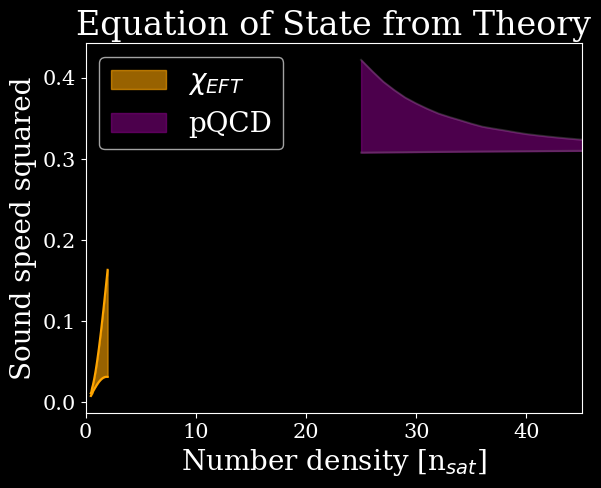

In [58]:

plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"


plt.plot(n_ceft, cs2_lower, color="orange")
plt.plot(n_ceft, cs2_upper, color="orange")
plt.fill_between(n_ceft, cs2_lower, cs2_upper, color='orange', alpha=0.6, label=r"$\chi_{EFT}$")

#plt.plot(binned_data[0][0][1:-1], cs2_mean, label='mean')
plt.plot(binned_data[0][0][1:-1], cs2_min, color = "gray",alpha=0.3)
plt.plot(binned_data[0][0][1:-1], cs2_max, color = "gray",alpha=0.3)
#plt.plot(binned_data[0][0][1:-1], cs2_mean_high_low, label='halfway')

plt.fill_between(binned_data[0][0][1:-1], cs2_min, cs2_max, color='purple', alpha=0.6, label="pQCD")

plt.ylabel('Sound speed squared', fontsize=20)
plt.xlabel('Number density [n$_{sat}$]', fontsize=20)
plt.title(r'Equation of State from Theory')
plt.legend()
plt.rcParams["font.size"] = 20
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,45)
plt.show()

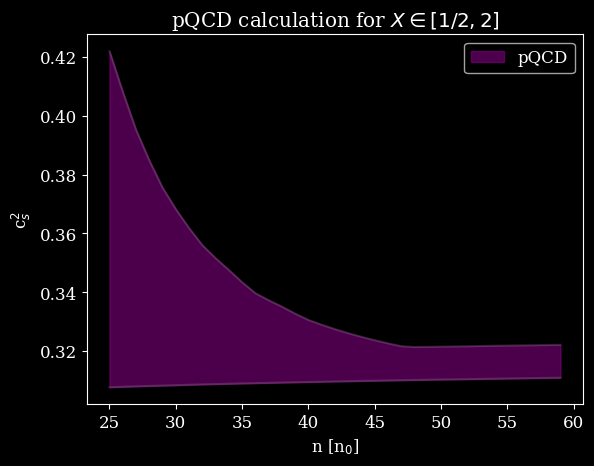

In [52]:

plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"

#plt.plot(binned_data[0][0][1:-1], cs2_mean, label='mean')
plt.plot(binned_data[0][0][1:-1], cs2_min, color = "gray",alpha=0.3)
plt.plot(binned_data[0][0][1:-1], cs2_max, color = "gray",alpha=0.3)
#plt.plot(binned_data[0][0][1:-1], cs2_mean_high_low, label='halfway')

plt.fill_between(binned_data[0][0][1:-1], cs2_min, cs2_max, color='purple', alpha=0.6, label="pQCD")

plt.ylabel('c$_s^2$')
plt.xlabel('n [n$_0$]')
plt.title(r'pQCD calculation for $X\in[1/2,2]$')
plt.legend()


plt.show()

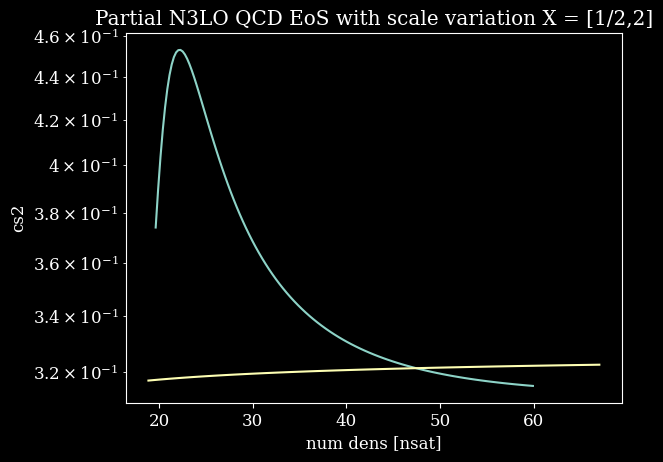

In [53]:

mu_grid = np.linspace(2.0,3,100) #Grid in chemical potential in [GeV]

pQCD1 = pQCD(1/2) #X=1/2 
pQCD2 = pQCD(2) #X=2 

plt.plot(np.vectorize(pQCD1.number_density)(mu_grid)/0.16, np.vectorize(pQCD1.speed2)(mu_grid), label='X=1/2')
plt.plot(np.vectorize(pQCD2.number_density)(mu_grid)/0.16, np.vectorize(pQCD2.speed2)(mu_grid), label='X=2')

plt.yscale('log')
plt.xlabel('num dens [nsat]')
plt.ylabel('cs2')
plt.title('Partial N3LO QCD EoS with scale variation X = [1/2,2]')
plt.show()

# hyperparam X

In [54]:
from scipy.stats import loguniform

def sample_X():
    """
    Sample from a log-uniform distribution between 1/2 and 2 for the renormalisation scale
    """

    X = loguniform.rvs(0.5, 2)

    return X

In [55]:
def get_pqcd(X: float, mu_low: float = 2.2, mu_high:float = 3, size: int = 100):
    """
    Retrieve pQCD calculations of number density (in n_sat) and sound speed squared using an X value (renormalisation scale)
    Default mu from 2.2 GeV to 3 GeV
    """

    from pqcd.pQCD import pQCD

    mu_grid = np.linspace(mu_low, mu_high, size)
        
    pQCD_temp = pQCD(X)
    n_pqcd  = np.vectorize(pQCD_temp.number_density)(mu_grid)/0.16 #nsat
    cs2_pqcd = np.vectorize(pQCD_temp.speed2)(mu_grid)
    
    return n_pqcd, cs2_pqcd